## Week 4, Lab 2: Predicting Chronic Kidney Disease in Patients
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

In this lab, we're going to focus on steps exploring data, building models and evaluating the models we build.

There are three links you may find important:
- [A set of chronic kidney disease (CKD) data and other biological factors](./chronic_kidney_disease_full.csv).
- [The CKD data dictionary](./chronic_kidney_disease_header.txt).
- [An article comparing the use of k-nearest neighbors and support vector machines on predicting CKD](./chronic_kidney_disease.pdf).

## Step 1: Define the problem.

Suppose you're working for Mayo Clinic, widely recognized to be the top hospital in the United States. In your work, you've overheard nurses and doctors discuss test results, then arrive at a conclusion as to whether or not someone has developed a particular disease or condition. For example, you might overhear something like:

> **Nurse**: Male 57 year-old patient presents with severe chest pain. FDP _(short for fibrin degradation product)_ was elevated at 13. We did an echo _(echocardiogram)_ and it was inconclusive.

> **Doctor**: What was his interarm BP? _(blood pressure)_

> **Nurse**: Systolic was 140 on the right; 110 on the left.

> **Doctor**: Dammit, it's an aortic dissection! Get to the OR _(operating room)_ now!

> _(intense music playing)_

In this fictitious but [Shonda Rhimes-esque](https://en.wikipedia.org/wiki/Shonda_Rhimes#Grey's_Anatomy,_Private_Practice,_Scandal_and_other_projects_with_ABC) scenario, you might imagine the doctor going through a series of steps like a [flowchart](https://en.wikipedia.org/wiki/Flowchart), or a series of if-this-then-that steps to diagnose a patient. The first steps made the doctor ask what the interarm blood pressure was. Because interarm blood pressure took on the values it took on, the doctor diagnosed the patient with an aortic dissection.

Your goal, as a research biostatistical data scientist at the nation's top hospital, is to develop a medical test that can improve upon our current diagnosis system for [chronic kidney disease (CKD)](https://www.mayoclinic.org/diseases-conditions/chronic-kidney-disease/symptoms-causes/syc-20354521).

**Real-world problem**: Develop a medical diagnosis test that is better than our current diagnosis system for CKD.

**Data science problem**: Develop a medical diagnosis test that reduces both the number of false positives and the number of false negatives.

---

## Step 2: Obtain the data.

#### 1. Read in the data.

In [1]:
import pandas as pd

ckd = pd.read_csv('chronic_kidney_disease_full.csv')
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [2]:
ckd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

#### 2. Check out the data dictionary. What are a few features or relationships you might be interested in checking out?

Answer: From th eincluded .pdf: "You  may  develop  complications  like  high blood  pressure,  anemia  (low  blood  count),  weak  bones,  poor 
nutritional health and nerve damage"

Features to check out:
1. High blood pressure: 'bp'
1. Anemia: 'rbc', 'rc', 'hemo', 'ane'

---

## Step 3: Explore the data.

#### 3. How much of the data is missing from each column?

In [3]:
ckd.isna().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

#### 4. Suppose that I dropped every row that contained at least one missing value. (In the context of analysis with missing data, we call this a "complete case analysis," because we keep only the complete cases!) How many rows would remain in our dataframe? What are at least two downsides to doing this?

> There's a good visual on slide 15 of [this deck](https://liberalarts.utexas.edu/prc/_files/cs/Missing-Data.pdf) that shows what a complete case analysis looks like if you're interested.

In [4]:
ckd.dropna().shape

(158, 25)

Answer: We would only keep (158/400) = 39.5% of the data. Less data = smaller sample = less confidence.

#### 5. Thinking critically about how our data were gathered, it's likely that these records were gathered by doctors and nurses. Brainstorm three potential areas (in addition to the missing data we've already discussed) where this data might be inaccurate or imprecise.

Answer: Human error from overworked staff. Human error when transcribing written records to data.

---

## Step 4: Model the data.

#### 6. Suppose that I want to construct a model where no person who has CKD will ever be told that they do not have CKD. What (very simple, no machine learning needed) model can I create that will never tell a person with CKD that they do not have CKD?

Answer: Tell everyone they have CKD.

#### 7. In problem 6, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: We minimized false negatives.

#### 8. Thinking ethically, what is at least one disadvantage to the model you described in problem 6?

Answer: People without CKD might undergo stress and anxiety from thinking they are sick.

#### 9. Suppose that I want to construct a model where a person who does not have CKD will ever be told that they do have CKD. What (very simple, no machine learning needed) model can I create that will accomplish this?

Answer: Tell everyone they do not have CKD

#### 10. In problem 9, what common classification metric did we optimize for? Did we minimize false positives or negatives?

Answer: False negatives

#### 11. Thinking ethically, what is at least one disadvantage to the model you described in problem 9?

Answer: Some people will suffer from CKD and not get treatment, diminishing their quality of life and possibly causing death.

#### 12. Construct a logistic regression model in `sklearn` predicting class from the other variables. You may scale, select/drop, and engineer features as you wish - build a good model! Make sure, however, that you include at least one categorical/dummy feature and at least one quantitative feature.

Remember to do a train/test split. We suggest using GridSearchCV and pipelines.

In [5]:
# Import tools
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer

In [6]:
# Sanity check
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [7]:
ckd['class'].value_counts()

ckd       250
notckd    150
Name: class, dtype: int64

In [8]:
# Transform 'class' to 0 and 1
ckd['class'] = ckd['class'].map(
    {
        'ckd': 1,
        'notckd': 0
    }
)
ckd.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,1


In [9]:
ckd.dropna(inplace=True)

In [10]:
# Train-Test split
X = ckd.drop(columns='class')
y = ckd['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1331, stratify=y)

In [22]:
y.value_counts(normalize=True)

0    0.727848
1    0.272152
Name: class, dtype: float64

In [11]:
X.shape

(158, 24)

In [12]:
y.shape

(158,)

In [13]:
X_train.shape

(118, 24)

In [14]:
y_train.shape

(118,)

In [15]:
# Create a column transformer to handle features with 'object' dtype
ct = make_column_transformer(
    (OneHotEncoder(), make_column_selector(dtype_include=object)),
    remainder='passthrough',
    verbose_feature_names_out=False
)

In [16]:
pipe = make_pipeline(
    ct,
    StandardScaler(),
    LogisticRegression()
)

In [17]:
pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'standardscaler', 'logisticregression', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__verbose_feature_names_out', 'columntransformer__onehotencoder', 'columntransformer__onehotencoder__categories', 'columntransformer__onehotencoder__drop', 'columntransformer__onehotencoder__dtype', 'columntransformer__onehotencoder__handle_unknown', 'columntransformer__onehotencoder__sparse', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'logisticregression__C', 'logisticregression__class_weight', 'logisticregression__dual', 'logisticregression__fit_intercept', 'logisticregression__intercept_scaling', 'logisticregression__l1_ratio', 'logisticregression__max_iter', 'logisticregression__multi_class', 'logisticregression__n_jobs', '

In [18]:
params = {
    'logisticregression__C': [.001, .01, .1, 1, 10, 100],
    'logisticregression__max_iter': [10_000],
    'logisticregression__n_jobs': [-1]
}

In [19]:
gs = GridSearchCV(pipe, params, n_jobs=-1)

In [20]:
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.193638,0.017464,0.039774,0.008439,0.001,10000,-1,"{'logisticregression__C': 0.001, 'logisticregr...",0.791667,0.708333,0.75,0.739130,0.869565,0.771739,0.055719,6
1,0.147959,0.053230,0.025659,0.004637,0.01,10000,-1,"{'logisticregression__C': 0.01, 'logisticregre...",0.958333,0.916667,1.00,0.956522,1.000000,0.966304,0.031286,5
2,0.116858,0.016822,0.025036,0.005303,0.1,10000,-1,"{'logisticregression__C': 0.1, 'logisticregres...",0.958333,0.958333,1.00,1.000000,1.000000,0.983333,0.020412,4
3,0.118274,0.008336,0.026565,0.005900,1,10000,-1,"{'logisticregression__C': 1, 'logisticregressi...",1.000000,1.000000,1.00,1.000000,1.000000,1.000000,0.000000,1
4,0.103984,0.015352,0.026277,0.010259,10,10000,-1,"{'logisticregression__C': 10, 'logisticregress...",1.000000,1.000000,1.00,1.000000,1.000000,1.000000,0.000000,1
5,0.112502,0.019911,0.025158,0.005584,100,10000,-1,"{'logisticregression__C': 100, 'logisticregres...",1.000000,1.000000,1.00,1.000000,1.000000,1.000000,0.000000,1


In [26]:
preds = gs.predict(X_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0])

---

## Step 5: Evaluate the model.

#### 13. How well does your model perform in terms of accuracy?

In [21]:
print(f"Testing Accuracy: {gs.score(X_test, y_test)}")
print(f"Training Accuracy: {gs.score(X_train, y_train)}")

Testing Accuracy: 1.0
Training Accuracy: 1.0


Answer: The model is 100% accurate

#### 14. Does it make sense to generate a confusion matrix on our training data or our test data? Why? Generate it on the proper data.

> Hint: Once you've generated your predicted $y$ values and you have your observed $y$ values, then it will be easy to [generate a confusion matrix using sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html).

Confusion matrix should be generated on the testing data to better evaluate the performance of the model.

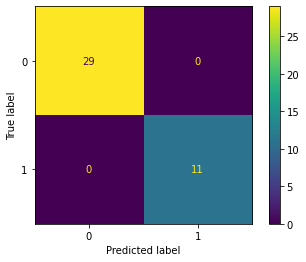

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

ConfusionMatrixDisplay.from_estimator(gs.best_estimator_, X_test, y_test);

#### 15. In this hospital case, we want to predict CKD. Do we want to optimize for sensitivity, specificity, or something else? Why? (If you don't think there's one clear answer, that's okay! There rarely is. Be sure to defend your conclusion!)

Answer: Given we want to reduce both false positives and false negatives, we should look at both sensitivity and specificity

#### 16. How does your model perform for your chosen metric?

Answer: The model has 100% sensitivity and specificity

In [28]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
print(f"Sensitivity: {tp / (tp + fn)}")
print(f"Specificity: {tn / (tn + fp)}")

Sensitivity: 1.0
Specificity: 1.0


#### 17. Plot the ROC Curve.

''

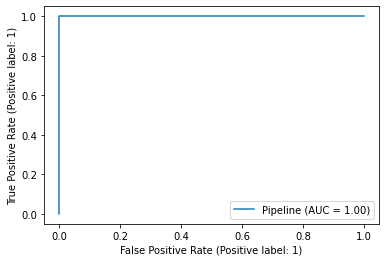

In [29]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_estimator(gs.best_estimator_, X_test, y_test)
;

#### 18. Despite being a relatively simple model, logistic regression is very widely used in the real world. Why do you think that's the case? Name at least two advantages to using logistic regression as a modeling technique.

- Simple to implement
- Interpretable

---

## Step 6: Answer the problem.

At this step, you would generally answer the problem! In this situation, you would likely present your model to doctors or administrators at the hospital and show how your model results in reduced false positives/false negatives. Next steps would be to find a way to roll this model and its conclusions out across the hospital so that the outcomes of patients with CKD (and without CKD!) can be improved!

We'll leave that for another day!

Our Logistic Regression model reduces false positives and false negatives to 0 when diagnosing CKD!